In [19]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from omegak import process_gbsar_data
import seaborn as sns
import glob
from PIL import Image
import datasets

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
dataset = datasets.load_dataset("images/")

Resolving data files:   0%|          | 0/601 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [33]:
dataset["train"][np.random.choice(range(600), 5)]

{'image': [<PIL.PngImagePlugin.PngImageFile image mode=L size=256x256>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=256x256>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=256x256>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=256x256>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=256x256>],
 'text': ['ar ps pr', 'gr gs ps', 'as ps gs', 'ps as gr', 'ar gr ps']}

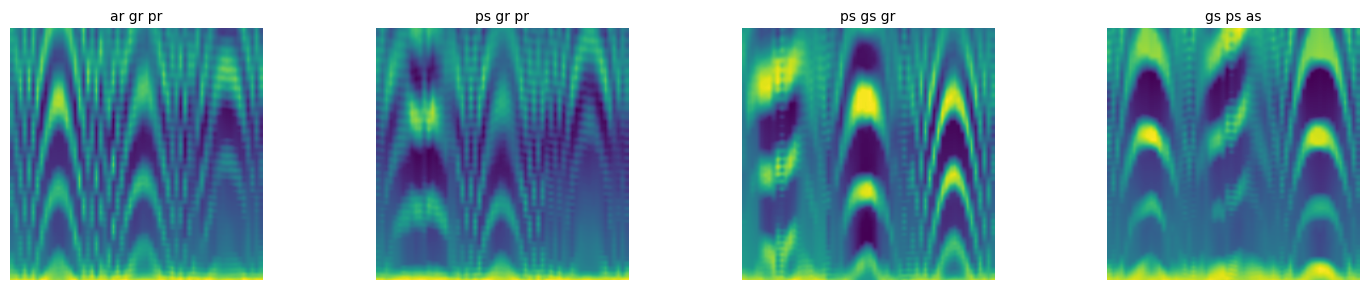

In [36]:
import random

import matplotlib.pyplot as plt

# Get 5 random indices
random_indices = np.random.choice(range(600), 4)

# Get the random images and their corresponding text
random_images = [dataset["train"]["image"][i] for i in random_indices]
random_texts = [dataset["train"]["text"][i] for i in random_indices]

# Create a figure with subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 3))

# Iterate over the random images and texts
for i, (image, text) in enumerate(zip(random_images, random_texts)):
    # Plot the image
    axes[i].imshow(image)
    axes[i].axis("off")
    # Add the text above the image
    axes[i].set_title(text, fontsize=10, pad=5)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [7]:
img = Image.open('images/AR_AS_GS_29.png')

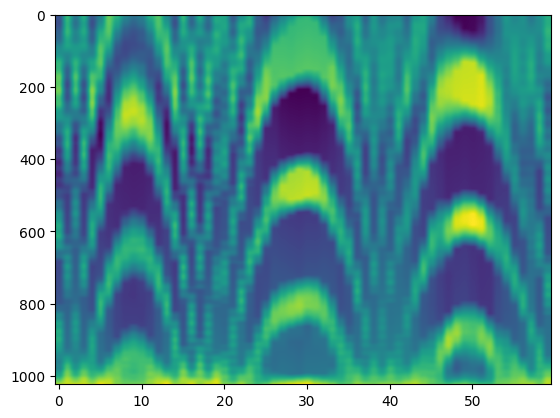

In [13]:
arr = np.load("concat_data/AR_AS_GS_29.npy").astype(np.float32)
plt.imshow(arr, aspect="auto")

 
** GBSAR parameters **
Step size:  1.0  cm
Number of steps:  60
Total aperture:  0.6  m
Number of chirp samples:  1024
Central frequency:  24.0  GHz
Bandwidth:  1300.0 MHz


/lustre/home/lmucko/diffusion/omegak.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  data[index] = ifft(remove_low_freq)


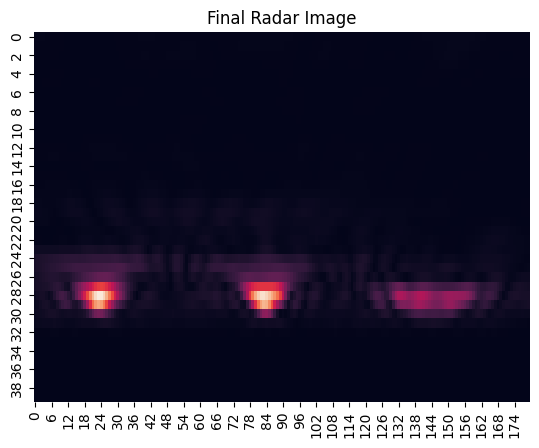

In [14]:
final_radar_image = process_gbsar_data(arr)

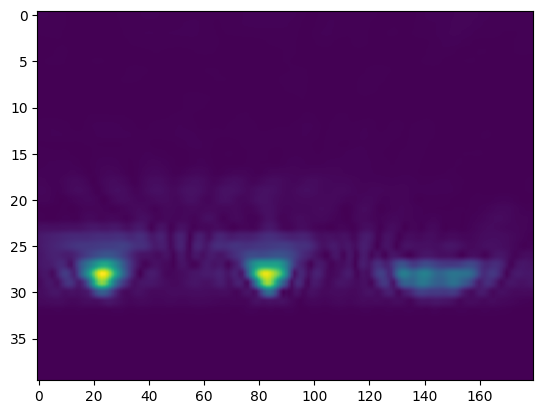

In [16]:
plt.imshow(np.abs(final_radar_image), aspect="auto")